# Analyzing the NYC Subway Dataset

In this project, I used statistical methods to figure out whether more people in NYC ride the subway when it is raining versus when it is not raining. Then we use data visualization to draw some interesting conclusions about the subway dataset.


In [1]:
#the NYC subway dataset   
%matplotlib inline
import pandas as pd

turnstile_master = pd.read_csv('turnstile_data_master_with_weather.csv')
turnstile_master.head(10)

#print turnstile_master_data.head()

,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0,0,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217,553,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890,1262,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451,3708,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400,2501,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
5,5,R001,2011-05-01,21:00:00,21,REGULAR,3372,2122,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
6,6,R002,2011-05-01,01:00:00,1,REGULAR,0,0,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
7,7,R002,2011-05-01,05:00:00,5,REGULAR,42,66,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
8,8,R002,2011-05-01,09:00:00,9,REGULAR,50,125,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
9,9,R002,2011-05-01,13:00:00,13,REGULAR,316,716,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0


# Section 1. Statistical Test

## 1.1 Statistical Test

Mann-Whitney U-Test is used to analyze the NYC subway data with two-tail P-value. 

The null hypothesis asserts that the distributions of both riderships on rainy and non-rainy day are identical.

Level of significance in Mann-Whitney U-Test is 5% (so p-critical value = 0.05)

Because the obtained p-value from scipy.stats.mannwhitneyu is for a one-tailed hypothesis, to get the two-tailed p-value multiply the returned p-value by 2 as noted in this link : http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mannwhitneyu.html 

## 1.2 Statistical Test Applicability

The dataset of hourly entries to MTA turntiles is separated by two different groups (riderships on rainy and non-rainy days). The Mann-Whitney U-test will check that the medians of two non-normal distributions are equal (null hypothesis). 
The distribution of riderships on rainy and non-rainy days are not normal shape (Gaussian Distribution), so it is appropriate to apply the Mann-Whitney U test to determine whether there is any statistically significant difference in the distributions of two groups. For more details is here: http://www.alglib.net/hypothesistesting/mannwhitneyu.php 

## 1.3 Test Results

Here is the result from this statistical test.

In [2]:
import numpy as np
import scipy
import scipy.stats

turnstile_rain = turnstile_master[turnstile_master['rain'] == 1]
turnstile_no_rain = turnstile_master[turnstile_master['rain'] == 0]
    
with_rain_mean = np.mean(turnstile_rain['ENTRIESn_hourly']) 
without_rain_mean = np.mean(turnstile_no_rain['ENTRIESn_hourly'])

print 'mean number of entries on rainy days: {0}\nmean number of entries non-rainy days: {1}\n'.format(with_rain_mean, without_rain_mean)
    
U,p  = scipy.stats.mannwhitneyu(turnstile_rain['ENTRIESn_hourly'],turnstile_no_rain['ENTRIESn_hourly'], use_continuity=True)
print 'Mann-Whitney U-test: {0}\np-Value: {1}'.format(U,p)



mean number of entries on rainy days: 1105.44637675
mean number of entries non-rainy days: 1090.27878015

Mann-Whitney U-test: 1924409167.0
p-Value: 0.0249999127935


## 1.4 Test Significance

In [3]:
significance_level = 0.05

#two-tailed test, multiply the returned p-value by 2
if p*2 <= significance_level:
    print 'Reject the null hypothesis'
else:
    print 'Retain the null hypothesis'

Reject the null hypothesis


We note that p-value of this statistical test is smaller than 0.05 , so we can confidently reject the null hypothesis. In other word, the distribution of two samples is significantly diferrent. 

Reference is http://psych.unl.edu/psycrs/handcomp/hcmann.PDF

# Section 2. Linear Regression

## 2.1 Prediction model

OLS (Ordinary Least Squares) using Statsmodels is used to compute the coefficients theta and produce prediction for ENTRIESn_hourly in my regression model.

Reference is https://en.wikipedia.org/wiki/Ordinary_least_squares

## 2.2 Feature Selection

The following features are extracted from the dataset:

    * rain 
    * precipi 
    * Hour 
    * meantempi 
    * meanpressurei
    * fog

In [4]:
# features selection
features = turnstile_master[['rain', 'precipi', 'Hour', 'meantempi', 'meanpressurei','fog']]

Dummy variable is used as feature in the regression model. The dummy variable is UNIT variable in dataset. 

In [5]:
# add dummy as features in the model
dummy_units = pd.get_dummies(turnstile_master['UNIT'], prefix='unit')
features = features.join(dummy_units)

## 2.3 Feature Selection Rationale

People will choose to use public transportation in the inconvenient weather conditions such as rain, fog, precipitation, average temperature to reduce the risk of traffic congestion. Thus these components are definitely used as features to predict the riders' decision making to take public trasportation.

meanpressurei is used to enhance the R-squared value a little bit. Hour is selected because we can see how ridership varies with time of day.



## 2.4 Model parameters

In [6]:
import statsmodels.api as sm

# Perform linear regression given a data set with an arbitrary number of features.
def linear_regression(features, values):
  
    features = sm.add_constant(features)
    model = sm.OLS(values,features)
    results = model.fit()
    
    intercept = results.params[0]
    params = results.params[1:]
    #print results.summary()
    return intercept, params


# Ridership Values
values = turnstile_master['ENTRIESn_hourly']

# Perform linear regression
intercept, params = linear_regression(features, values)


print 'The intercept of the linear regression : {0}\n'.format(intercept)
print 'The coefficients of the linear regression : \n{0}\n'.format(params[:6])

The intercept of the linear regression : 9390.16467851

The coefficients of the linear regression : 
rain             -53.112819
precipi           13.785268
Hour              67.393117
meantempi         -8.609136
meanpressurei   -266.949285
fog               76.888008
dtype: float64



## 2.5 R-Squared value

In [8]:
# prediction value from the regression model
predictions = intercept + np.dot(features, params)

# Total sum of squares
SST = ((values-np.mean(values))**2).sum()

# Regression sum of squares
SSReg = ((predictions-np.mean(values))**2).sum()

# calculate R2 (coefficients of determination) value.
r_squared = SSReg / SST

print 'The R2 value : {0}\n'.format(r_squared)

The R2 value : 0.45841184714



Reference this to calculate R2 Squared : https://en.wikipedia.org/wiki/Coefficient_of_determination

## 2.6 Goodness of fit 

The higher R-squared , the better a model fits the data. That means a higher R-squared is required for precision prediction. In this case, R-squared is rather low (45%) , so the linear regression model seems inappropriate for predicting ridership. However, R-squared does not neccesarily indicate that  a regression model is adequate or not. Sometimes we can have a low R-squared value for a good model, or a high R-squared value for a model that does not fit the data.

Reference: http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit



# Section 3. Visualization

## 3.1 ENTRIESn_hourly for rainy days and non-rainy days.

stat_bin: binwidth defaulted to range/30.
    Use 'binwidth = x' to adjust this.
/Users/ducvu/anaconda/lib/python2.7/site-packages/ggplot/geoms/geom_bar.py:47: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  _reset = self.bottom == None or (self.ax != None and self.ax != ax)


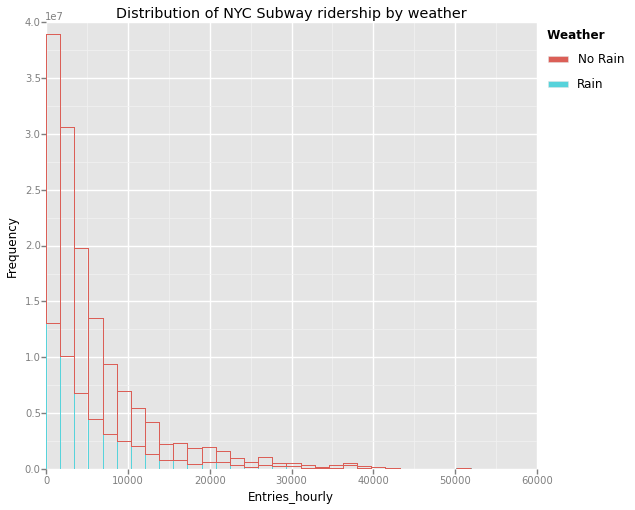

<ggplot: (316024997)>


In [11]:
import matplotlib.pyplot as plt
from ggplot import *


map_dict = {0: "no rain", 1: "rain"}
turnstile_master["weather"] = turnstile_master["rain"].map(map_dict)

plot = ggplot(turnstile_master, aes(x='ENTRIESn_hourly', color = 'weather')) \
        + geom_bar(aes(weight='ENTRIESn_hourly'),fill= '') \
        + ggtitle('Distribution of NYC Subway ridership by weather') + xlab('Entries_hourly') + ylab('Frequency')

print plot

The above histogram shows that the distribution of ridership on rainy and non-rainy days are not normal shape.

## 3.2 Ridership by day-of-week

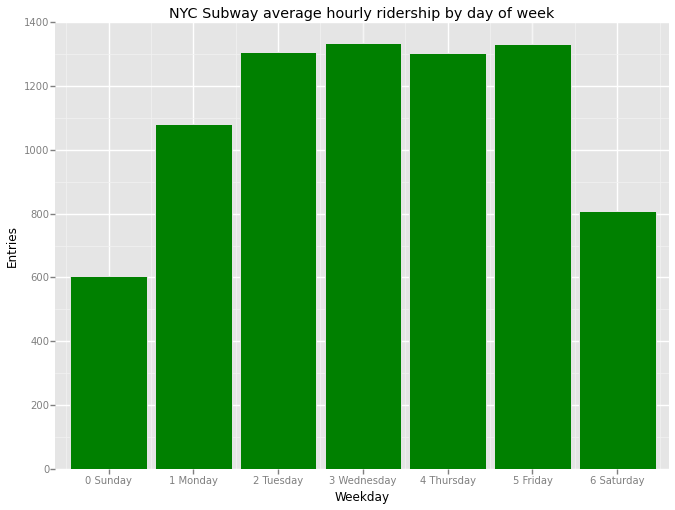

<ggplot: (277556221)>


In [12]:
from ggplot import *
from datetime import *
''' 
Ridership by time-of-day or day-of-week   
https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
'''
EntriesByDayOfMonth = turnstile_master[['DATEn', 'ENTRIESn_hourly']] \
                     .groupby('DATEn', as_index=False).mean()

EntriesByDayOfMonth['Day'] = [datetime.strptime(x, '%Y-%m-%d') \
                             .strftime('%w %A') for x in EntriesByDayOfMonth['DATEn']]

EntriesByDay = EntriesByDayOfMonth[['Day', 'ENTRIESn_hourly']] \
               .groupby('Day', as_index=False).mean()
    
#print EntriesByDay
                
plot = ggplot(EntriesByDay, aes('Day', 'ENTRIESn_hourly')) + \
        geom_bar(fill = 'green', stat='bar') + \
        ggtitle("NYC Subway average hourly ridership by day of week") + \
        xlab('Weekday') + ylab('Entries')
print plot

The bar chart shows the average hourly ridership in NYC subway and it indicates that more people ride the subway on the weekdays than weekends.

# Section 4. Conclusion

## 4.1 Ridership in the NYC subway when it is raining or when it is not raining

Based on analysis and visualization of the data, more people ride
the NYC subway when it is not raining

## 4.2 Rationale

Based on the Mann-Whitney U-test, the distributions of rainy days and non-rainy days are different (mean hourly entries on rainy days is greater than non-rainy days in [Section 1.3](#1.3-Test-Results)) . Furthermore, as seen in [Section 2.4](#2.4-Model-parameters) negative correlation cofficient of variable 'rain' (-53.1) indicates less people will use subway when it is raining.

# Section 5. Reflection

## 5.1 The shortcomings of the methods

The Ordinary Least Squares method suffers from the major pitfall that it attempts to fit a line through one dimensional data sets, or a hyperplane through higher dimensional datasets. In reality though, most problems are non-linear relationships. Even with an infinite amount of training points, linear method will often fail to make a good prediction. 

Another problem with this MTA data is that it consists of a lot independent variables and if I choose too many features, that will lead to a worse prediction. So keeping some useful dependent variables and discarding the other ones are also important to reduce the computational and storage capacities. That approach can be solved by feature selection methods like PCA, ICA.

Reference is http://www.clockbackward.com/2009/06/18/ordinary-least-squares-linear-regression-flaws-problems-and-pitfalls/